In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
95,96,Male,24,60,52
96,97,Female,47,60,47
97,98,Female,27,60,50
98,99,Male,48,61,42


In [3]:
df_shape= df.shape
print(df_shape)

(200, 5)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
X = df.iloc[:,[3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [18]:
from sklearn.cluster import KMeans
WCSS = []

In [19]:
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 0,n_init=10)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

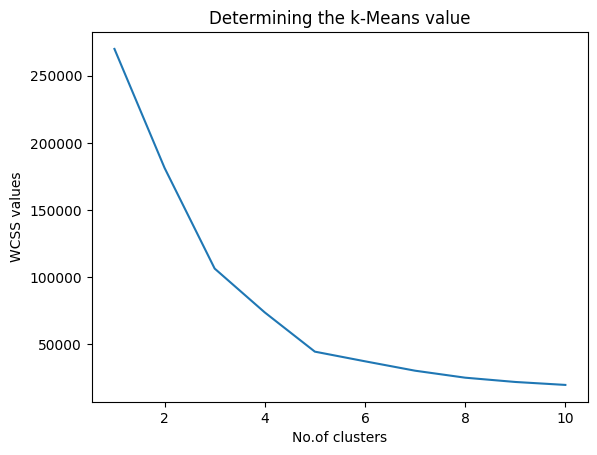

In [20]:
plt.plot(range(1,11),WCSS)
plt.title("Determining the k-Means value")
plt.xlabel("No.of clusters")
plt.ylabel("WCSS values")
plt.show()

In [22]:
Kmeansmodel = KMeans(n_clusters = 5 , init = 'k-means++',random_state = 0 , n_init = 10)
y_kmeans = Kmeansmodel.fit_predict(X)


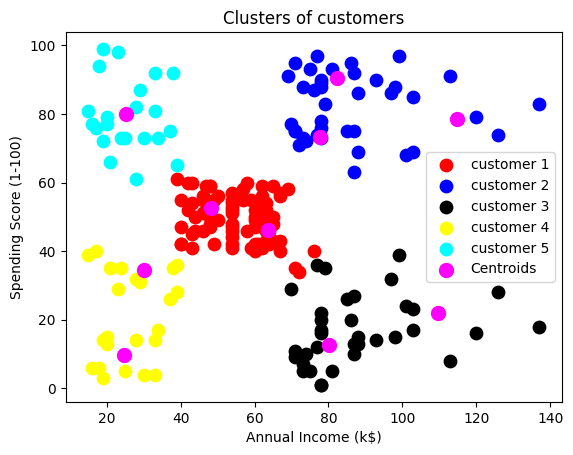

In [31]:
plt.scatter(X[y_kmeans == 0,0 ], X[y_kmeans == 0,1 ], s = 80 , c = "red" , label = "customer 1")
plt.scatter(X[y_kmeans == 1,0 ], X[y_kmeans == 1,1 ],  s = 80, c = "blue" , label = "customer 2")
plt.scatter(X[y_kmeans == 2,0 ], X[y_kmeans == 2,1 ],  s = 80 , c = "black" , label = "customer 3")
plt.scatter(X[y_kmeans == 3,0 ], X[y_kmeans == 3,1 ],  s = 80  , c = "yellow" , label = "customer 4")
plt.scatter(X[y_kmeans == 4,0 ], X[y_kmeans == 4,1 ],  s = 80 , c = "cyan" , label = "customer 5")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100 , c = 'magenta' , label = 'Centroids')
plt.title("Clusters of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()